# EDA - TikTok Dataset

Data Overview:

- 15 unique users
- 2200 Posts (very un-even distribution of posts per user)
- Data Includes a number of engadgment metrics, and potentialy the most valuble part of this dataset is the detailed timestamping of the posts

In [2]:
import pandas as pd
import numpy as np

# import the xlsx file
df = pd.read_excel('./training.xlsx')

df.head(5)

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count
0,'6702340935990119686,A10,1400000,6,7200000,285,1560510354,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79
1,'6704612694332280070,A10,1400000,6,7200000,285,1561039289,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14
2,'6707173090796768518,A10,1400000,6,7200000,285,1561635428,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72
3,'6708980823044918533,A10,1400000,6,7200000,285,1562056323,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86
4,'6712756116222135557,A10,1400000,6,7200000,285,1562935330,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15


In [3]:
df['author_id'].value_counts()

author_id
A11    510
A4     415
A10    248
A1     176
A5     145
A2     145
A14     94
A15     75
A9      71
A6      69
A13     53
A3      53
A8      51
A7      48
A12     47
Name: count, dtype: int64

In [4]:
num_unique_authors = df['author_id'].nunique()
print(num_unique_authors)

15


In [5]:
# convert the video_create_date from absolute date to year month day
df['video_create_date'] = pd.to_datetime(df['video_create_date'], unit='s')
df['hour'] = df['video_create_date'].dt.hour


In [6]:
df.head()

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count,hour
0,'6702340935990119686,A10,1400000,6,7200000,285,2019-06-14 11:05:54,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79,11
1,'6704612694332280070,A10,1400000,6,7200000,285,2019-06-20 14:01:29,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14,14
2,'6707173090796768518,A10,1400000,6,7200000,285,2019-06-27 11:37:08,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72,11
3,'6708980823044918533,A10,1400000,6,7200000,285,2019-07-02 08:32:03,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86,8
4,'6712756116222135557,A10,1400000,6,7200000,285,2019-07-12 12:42:10,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15,12


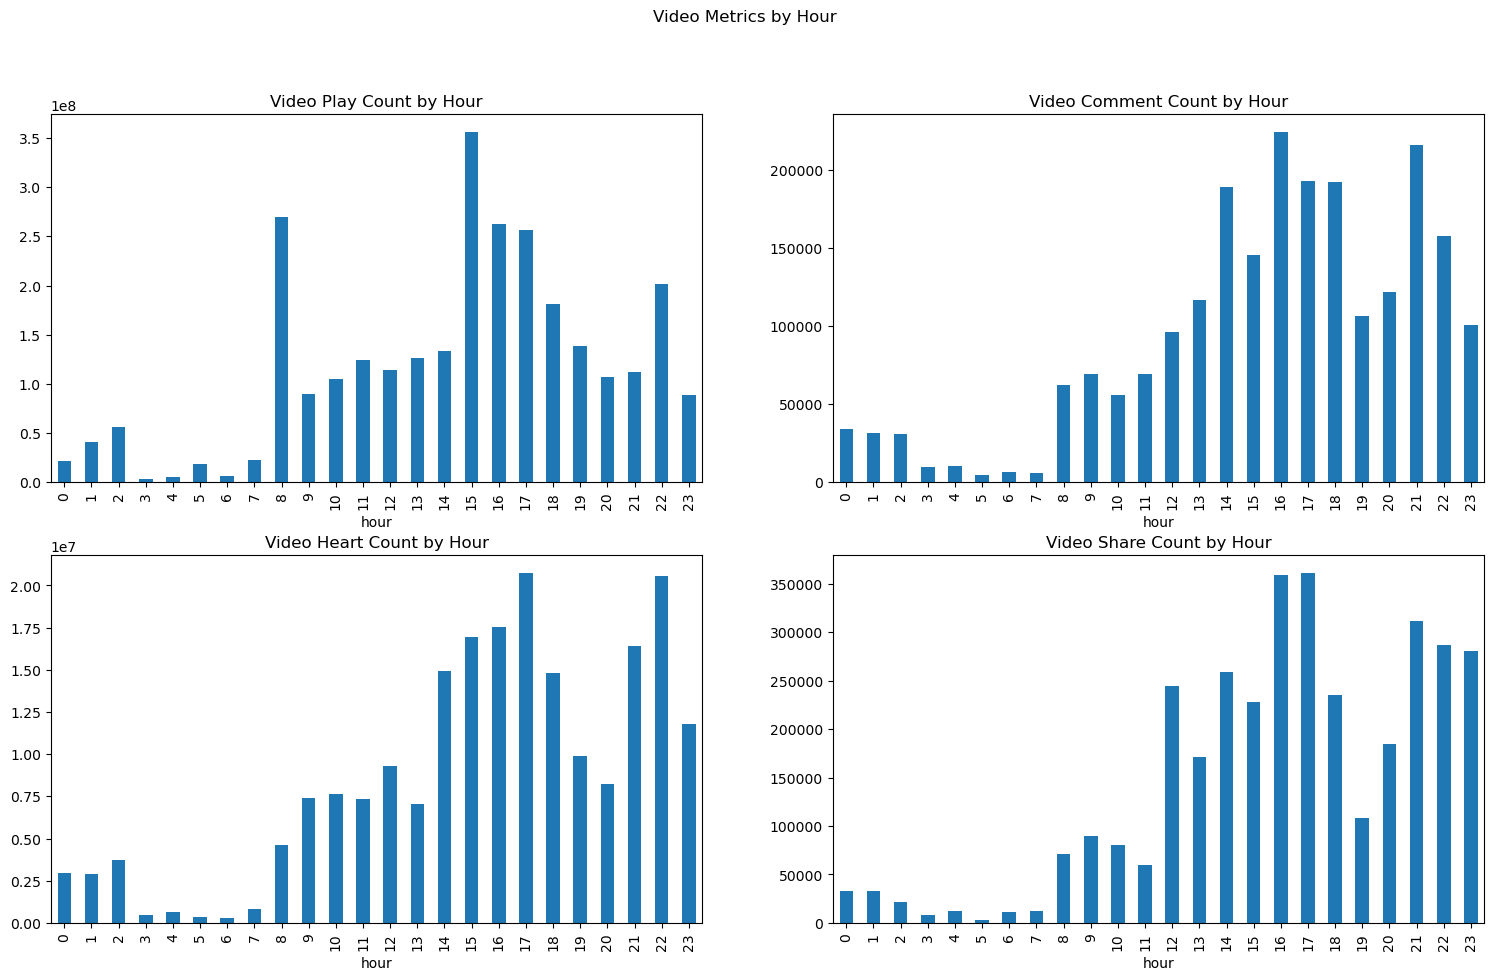

In [7]:
# now let's plot all of these each in different subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
#increase the figure size
fig.set_size_inches(18.5, 10.5)
df.groupby('hour')['video_play_count'].sum().plot(kind='bar', ax=axs[0, 0])
df.groupby('hour')['video_comment_count'].sum().plot(kind='bar', ax=axs[0, 1])
df.groupby('hour')['video_heart_count'].sum().plot(kind='bar', ax=axs[1, 0])
df.groupby('hour')['video_share_count'].sum().plot(kind='bar', ax=axs[1, 1])
#add subplots titles
axs[0, 0].set_title('Video Play Count by Hour')
axs[0, 1].set_title('Video Comment Count by Hour')
axs[1, 0].set_title('Video Heart Count by Hour')
axs[1, 1].set_title('Video Share Count by Hour')


# add a title to the plot
plt.suptitle('Video Metrics by Hour')
plt.show()


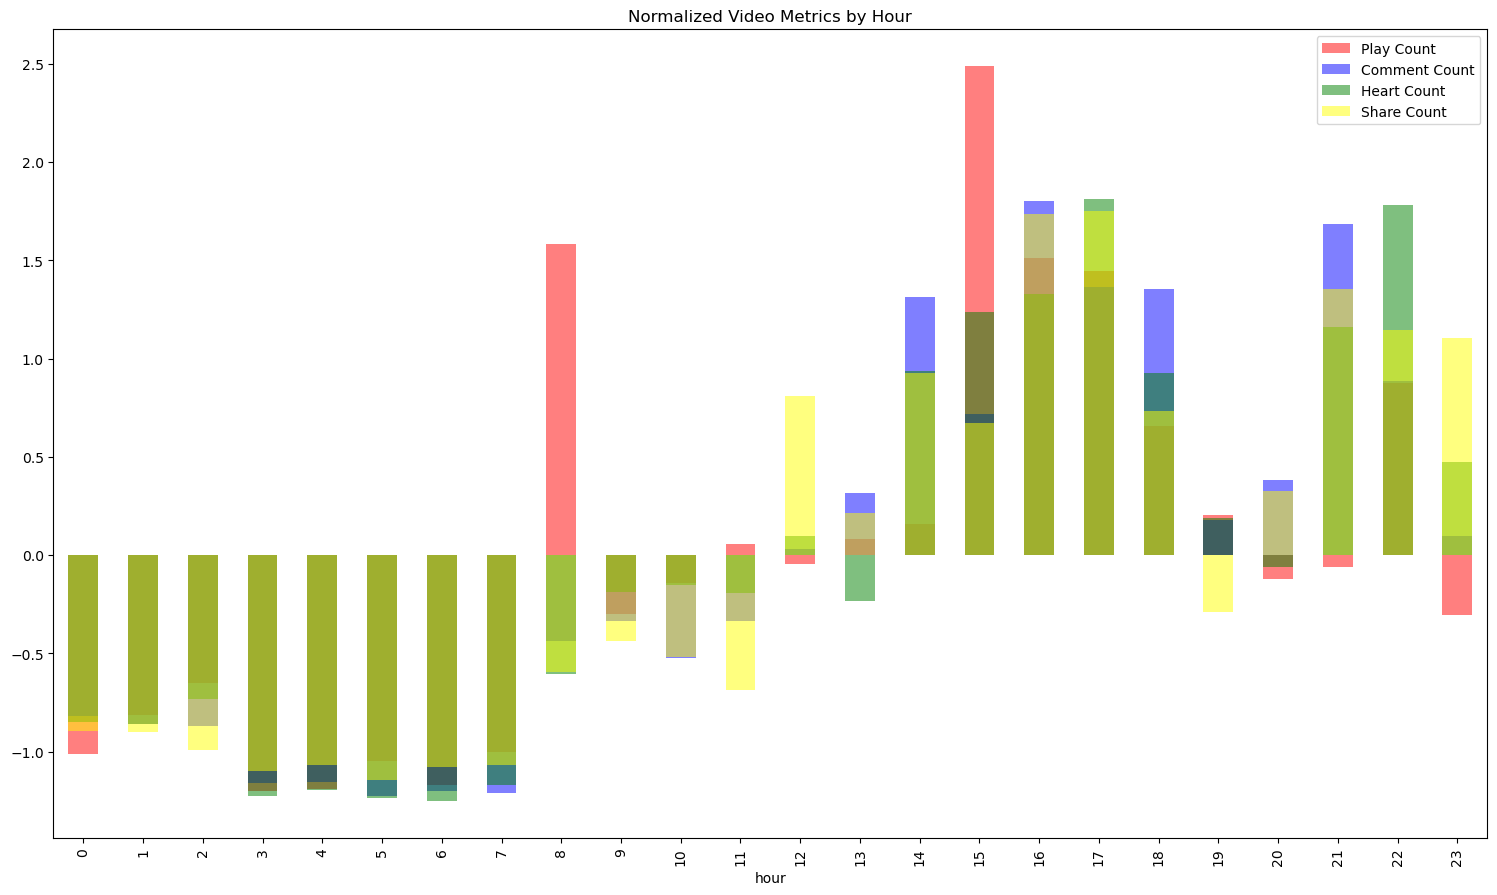

In [8]:

norm_play_count = (df.groupby('hour')['video_play_count'].sum() - df.groupby('hour')['video_play_count'].sum().mean()) / df.groupby('hour')['video_play_count'].sum().std() 
norm_comment_count = (df.groupby('hour')['video_comment_count'].sum() - df.groupby('hour')['video_comment_count'].sum().mean()) / df.groupby('hour')['video_comment_count'].sum().std()
norm_heart_count = (df.groupby('hour')['video_heart_count'].sum() - df.groupby('hour')['video_heart_count'].sum().mean()) / df.groupby('hour')['video_heart_count'].sum().std()
norm_share_count = (df.groupby('hour')['video_share_count'].sum() - df.groupby('hour')['video_share_count'].sum().mean()) / df.groupby('hour')['video_share_count'].sum().std()

# plot them all on the same set of axes for comparison
norm_play_count.plot(kind='bar', color='red', alpha=0.5)
norm_comment_count.plot(kind='bar', color='blue', alpha=0.5)
norm_heart_count.plot(kind='bar', color='green', alpha=0.5)
norm_share_count.plot(kind='bar', color='yellow', alpha=0.5)
plt.legend(['Play Count', 'Comment Count', 'Heart Count', 'Share Count'])
plt.title('Normalized Video Metrics by Hour')
# increase the figure size
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

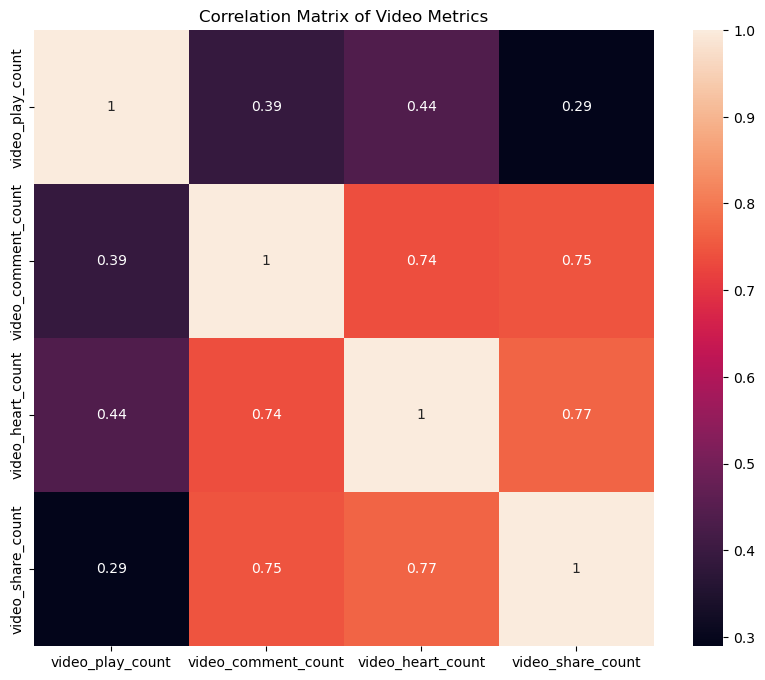

In [9]:
# let's get the correlation between the metrics
df[['video_play_count', 'video_comment_count', 'video_heart_count', 'video_share_count']].corr()

# let's plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[['video_play_count', 'video_comment_count', 'video_heart_count', 'video_share_count']].corr(), annot=True)
plt.title('Correlation Matrix of Video Metrics')
plt.show()

In [10]:
df['video_description'] = df['video_description'].fillna('').astype(str)
df['video_definition'].fillna('unknown', inplace=True)
df['video_format'].fillna('unknown', inplace=True)
df['word_count'] = df['video_description'].apply(lambda x: len(str(x).split()))
df.head()

C:\Users\sirui\AppData\Local\Temp\ipykernel_25052\3834537937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video_definition'].fillna('unknown', inplace=True)
C:\Users\sirui\AppData\Local\Temp\ipykernel_25052\3834537937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count,hour,word_count
0,'6702340935990119686,A10,1400000,6,7200000,285,2019-06-14 11:05:54,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79,11,11
1,'6704612694332280070,A10,1400000,6,7200000,285,2019-06-20 14:01:29,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14,14,14
2,'6707173090796768518,A10,1400000,6,7200000,285,2019-06-27 11:37:08,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72,11,16
3,'6708980823044918533,A10,1400000,6,7200000,285,2019-07-02 08:32:03,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86,8,10
4,'6712756116222135557,A10,1400000,6,7200000,285,2019-07-12 12:42:10,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15,12,12


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation

# Text sentiment analysis
df['sentiment_polarity'] = df['video_description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_subjectivity'] = df['video_description'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Topic modeling using LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(df['video_description'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
df['topic'] = lda.fit_transform(text_matrix).argmax(axis=1)

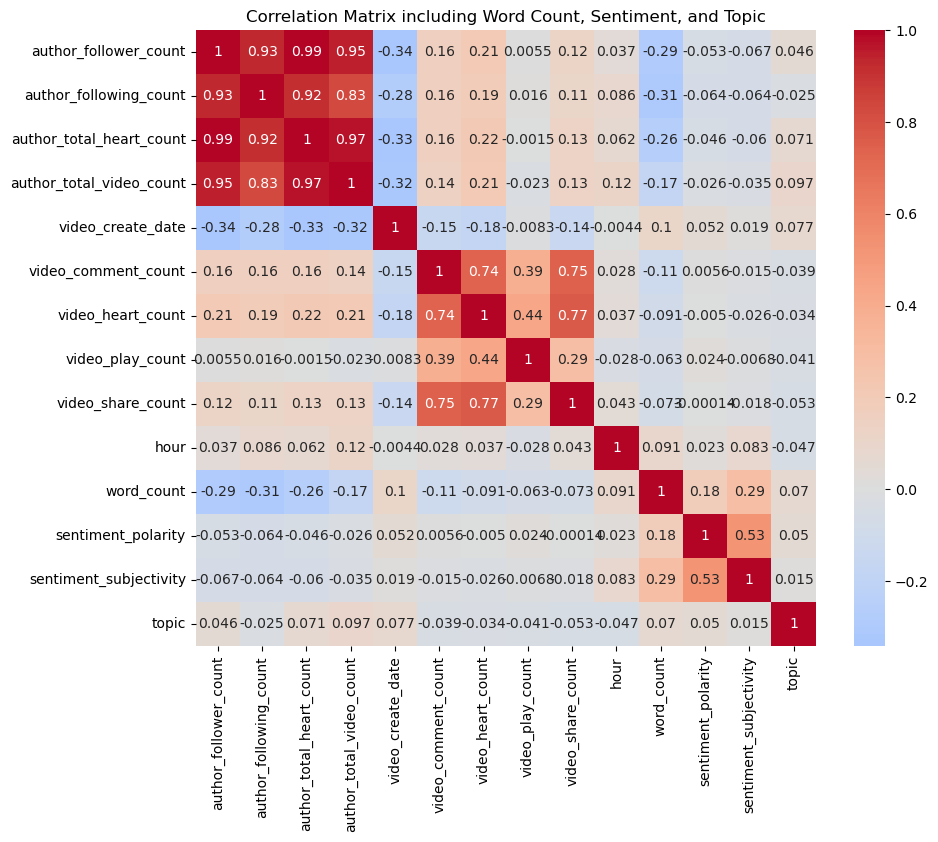

In [12]:
columns_not_in_corr = ['author_id', 'video_id', 'video_description','video_definition',	'video_format']


df_for_corr = df.drop(columns=columns_not_in_corr)

# correlation matrix
corr = df_for_corr.corr()

# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix including Word Count, Sentiment, and Topic')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

df['log_video_play_count'] = np.log1p(df['video_play_count'])

# selest feature and target, split to train and test set
features = df[['author_follower_count', 'sentiment_polarity', 'sentiment_subjectivity', 'topic', 'word_count', 'hour']]
target = df['log_video_play_count']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# standardlization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict using the test set and 
y_pred_log_rf = rf_model.predict(X_test_scaled)
mae_log_rf = mean_absolute_error(y_test, y_pred_log_rf)
print(f'Random Forest MAE in log space: {mae_log_rf}')

# Inverse the log transformation, get the actual MAE
y_test_original = np.expm1(y_test)
y_pred_original_rf = np.expm1(y_pred_log_rf)
mae_rf = mean_absolute_error(y_test_original, y_pred_original_rf)
print(f'Random Forest MAE in original scale: {mae_rf}')

# Using the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_log_xgb = xgb_model.predict(X_test_scaled)
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
print(f'XGBoost MAE in log space: {mae_log_xgb}')

y_pred_original_xgb = np.expm1(y_pred_log_xgb)
mae_xgb = mean_absolute_error(y_test_original, y_pred_original_xgb)
print(f'XGBoost MAE in original scale: {mae_xgb}')

# Evaluating model performance using cross-validation
cv_scores_rf = cross_val_score(rf_model, scaler.fit_transform(features), target, cv=5, scoring='neg_mean_absolute_error')
cv_mae_rf = -np.mean(cv_scores_rf)
print(f'Cross-Validated MAE for Random Forest in log space: {cv_mae_rf}')

cv_scores_xgb = cross_val_score(xgb_model, scaler.fit_transform(features), target, cv=5, scoring='neg_mean_absolute_error')
cv_mae_xgb = -np.mean(cv_scores_xgb)
print(f'Cross-Validated MAE for XGBoost in log space: {cv_mae_xgb}')


Random Forest MAE in log space: 1.2298913580375779
Random Forest MAE in original scale: 1395054.7034512018
XGBoost MAE in log space: 1.3161921813470634
XGBoost MAE in original scale: 1474401.6735174004
Cross-Validated MAE for Random Forest in log space: 1.2763674543335763
Cross-Validated MAE for XGBoost in log space: 1.3195759101549709


Random Forest (Log Space) - MAE: 1.2335069592106709, RMSE: 1.68754525715576, R²: 0.247444381635604
XGBoost (Log Space) - MAE: 1.2988661107119854, RMSE: 1.7685925451000966, R²: 0.17342298382338828
Cross-Validated MAE for Random Forest (Log Space): 1.1746445815288287
Cross-Validated MAE for XGBoost (Log Space): 1.2515412553428817


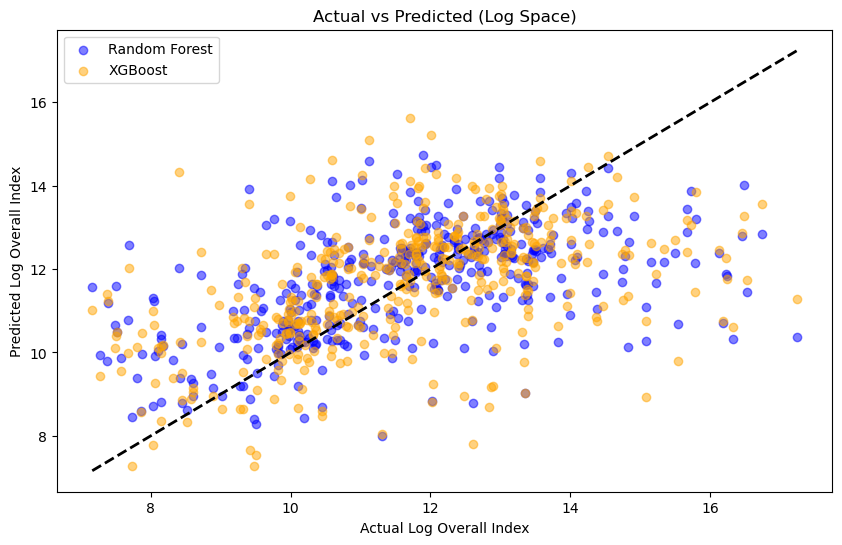

                  Feature  Importance
0   author_follower_count    0.392309
1              word_count    0.210285
5                    hour    0.170972
2      sentiment_polarity    0.085488
4                   topic    0.072823
3  sentiment_subjectivity    0.068123


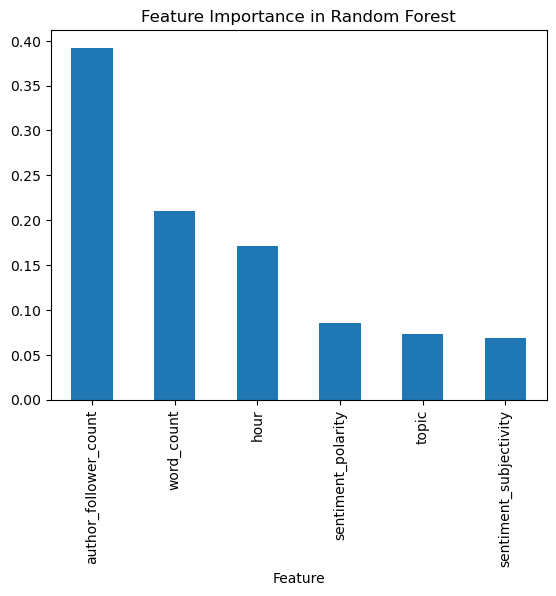

                  Feature  Importance
0   author_follower_count    0.420785
1              word_count    0.128857
2      sentiment_polarity    0.124001
4                   topic    0.120956
5                    hour    0.109884
3  sentiment_subjectivity    0.095517


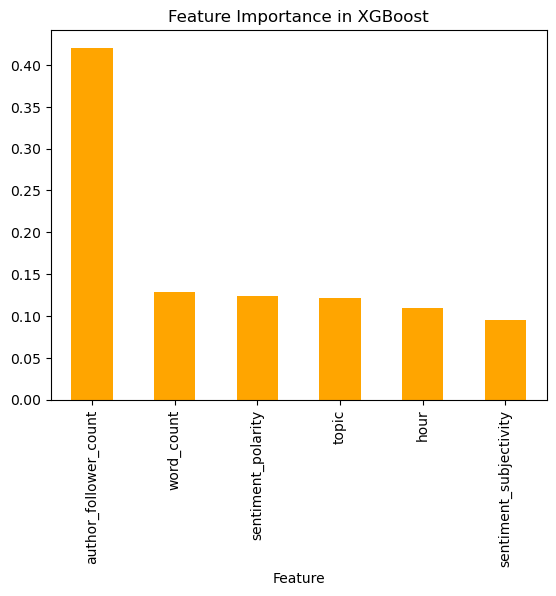

In [ ]:
# comprehensive TikTok score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df['overall_index'] = (
    df['video_play_count'] * 0.5 +
    df['video_comment_count'] * 0.2 +
    df['video_heart_count'] * 0.2 +
    df['video_share_count'] * 0.1
)

# Apply log transformation to the target variable
df['log_overall_index'] = np.log1p(df['overall_index'])

features = df[['author_follower_count', 'word_count', 'sentiment_polarity',
               'sentiment_subjectivity', 'topic', 'hour']]
target = df['log_overall_index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_log_rf = rf_model.predict(X_test_scaled)

# XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_log_xgb = xgb_model.predict(X_test_scaled)

# mae
mae_rf = mean_absolute_error(y_test, y_pred_log_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_log_xgb)

# rmse
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_log_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))

# r2
r2_rf = r2_score(y_test, y_pred_log_rf)
r2_xgb = r2_score(y_test, y_pred_log_xgb)

print(f"Random Forest (Log Space) - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"XGBoost (Log Space) - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

# Cross-validated MAE for both models
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_rf = -cv_scores_rf.mean()

cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_xgb = -cv_scores_xgb.mean()

print(f"Cross-Validated MAE for Random Forest (Log Space): {cv_mae_rf}")
print(f"Cross-Validated MAE for XGBoost (Log Space): {cv_mae_xgb}")

# Visualize actual vs predicted values in log space
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_log_rf, alpha=0.5, label='Random Forest', color='blue')
plt.scatter(y_test, y_pred_log_xgb, alpha=0.5, label='XGBoost', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Overall Index')
plt.ylabel('Predicted Log Overall Index')
plt.legend()
plt.title('Actual vs Predicted (Log Space)')
plt.show()

# Feature importance visualization Random Forest
feature_importances_rf = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_rf)

# Plot feature importance Random Forest
feature_importances_rf.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance in Random Forest')
plt.show()

# Feature importance visualization XGBoost
feature_importances_xgb = pd.DataFrame({
    'Feature': features.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_xgb)

# Plot feature importanc XGBoost
feature_importances_xgb.plot(kind='bar', x='Feature', y='Importance', legend=False, color='orange')
plt.title('Feature Importance in XGBoost')
plt.show()





# Conclusions:

We can see from a quick set of tests, that there are some notable trends and correlations that can be investigated, and leveraged for determining optimal posting parameters for improved user engadgment. As well as some negative correlations such as that between description word count, and follower count that seem abnormal and deserve further investigation.